In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind, pearsonr

# Проанализируем таблицу данных оценки постковидных состояний («долгого COVID»)

Данные разбиты по различным демографическим факторам, включая возраст, пол, гендерную идентичность, сексуальную ориентацию, расовую/этническую принадлежность и уровень образования, а также по штатам, демонстрируют продолжительность и тяжесть симптомов, методы лечения, сроки восстановления и показатели качества жизни.
Данные собирались на всей территории Соединенных Штатов в период с июня 2022 по август 2024 года.

Этот набор данных можно использовать для анализа факторов риска, выявления закономерностей симптомов, прогнозирования долгосрочных последствий для здоровья и разработки стратегий лечения пациентов после перенесенного COVID на основе имеющихся данных.

Ключевые вопросы для анализа:

*   Общий процент взрослых, когда-либо испытывавших Long COVID
*   Процент переболевших COVID, у которых развился Long COVID
* Текущая распространенность Long COVID среди всех взрослых
* Текущая распространенность среди переболевших COVID



In [ ]:
df = pd.read_csv('Post-COVID_Conditions.csv')

Размер данных:

In [ ]:
df.shape

(18639, 16)

Первые 3 строки:

1.  **Indicator**  -  Показатель/Индикатор
2.  **Group** - Группа
3.  **State** - Штат
4.  **Subgroup** - Подгруппа
5.  **Phase** - Фаза опроса
6.  **Time Period** - Период сбора данных
7.  **Time Period Label** - Метка временного периода
8.  **Time Period Start Date** - Дата начала периода
9.  **Time Period End Date** - Дата окончания периода
10.  **Value** - Ценность (- расчётный процент по данному показателю в подгруппе)
11.  **LowCI** - Нижняя граница доверительного интервала
12.  **HighCI** - Верхняя граница доверительного интервала
13.  **Confidence Interval** - Доверительный интервал
14.  **Quartile range** - Квартильный диапазон
15.  **Quartile number** - Номер квартиля
16.  **Suppression Flag** - Флаг подавления данных

In [ ]:
df.head(3)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile range,Quartile number,Suppression Flag
0,"Ever experienced long COVID, as a percentage o...",National Estimate,United States,United States,3.5,46,"Jun 1 - Jun 13, 2022",06/01/2022,06/13/2022,14.0,13.5,14.5,13.5 - 14.5,NaN,NaN,NaN
1,"Ever experienced long COVID, as a percentage o...",By Age,United States,18 - 29 years,3.5,46,"Jun 1 - Jun 13, 2022",06/01/2022,06/13/2022,17.8,15.9,19.8,15.9 - 19.8,NaN,NaN,NaN
2,"Ever experienced long COVID, as a percentage o...",By Age,United States,30 - 39 years,3.5,46,"Jun 1 - Jun 13, 2022",06/01/2022,06/13/2022,15.2,14.1,16.2,14.1 - 16.2,NaN,NaN,NaN


Информация о данных:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               18639 non-null  object 
 1   Group                   18639 non-null  object 
 2   State                   18639 non-null  object 
 3   Subgroup                18639 non-null  object 
 4   Phase                   18639 non-null  float64
 5   Time Period             18639 non-null  int64  
 6   Time Period Label       18639 non-null  object 
 7   Time Period Start Date  18639 non-null  object 
 8   Time Period End Date    18639 non-null  object 
 9   Value                   16186 non-null  float64
 10  LowCI                   16186 non-null  float64
 11  HighCI                  16186 non-null  float64
 12  Confidence Interval     16186 non-null  object 
 13  Quartile range          11780 non-null  object 
 14  Quartile number         11777 non-null

Статистика числовых столбцов:

In [ ]:
print(df.describe())

              Phase   Time Period         Value         LowCI        HighCI  \
count  18639.000000  18639.000000  16186.000000  16186.000000  16186.000000   
mean       3.617479     57.670208     22.978111     19.675516     26.588855   
std        0.912296     12.835375     22.475114     20.853023     23.909894   
min       -1.000000      1.000000      0.000000      0.000000      0.500000   
25%        3.600000     53.000000      5.900000      4.400000      7.700000   
50%        3.800000     59.000000     14.700000     11.400000     18.100000   
75%        4.000000     66.000000     31.300000     26.500000     38.300000   
max        4.200000     72.000000     92.800000     90.300000     95.400000   

       Quartile number  Suppression Flag  
count     11777.000000            1832.0  
mean          1.961620               1.0  
std           1.553579               0.0  
min          -1.000000               1.0  
25%           1.000000               1.0  
50%           2.000000        

Пустых значений в нашей таблице

In [ ]:
missing_counts = df.isna().sum()
print(missing_counts[missing_counts > 0])

Value                   2453
LowCI                   2453
HighCI                  2453
Confidence Interval     2453
Quartile range          6859
Quartile number         6862
Suppression Flag       16807
dtype: int64


Уникальные значения в ключевых столбцах:

In [ ]:
print("Indicator:", df['Indicator'].unique())
print("Group:", df['Group'].unique())
print("Time Period Label:", df['Time Period Label'].unique())

Indicator: ['Ever experienced long COVID, as a percentage of all adults'
 'Ever had COVID'
 'Ever experienced long COVID, as a percentage of adults who ever had COVID'
 'Currently experiencing long COVID, as a percentage of all adults'
 'Currently experiencing long COVID, as a percentage of adults who ever had COVID'
 'Any activity limitations from long COVID, as a percentage of adults who currently have long COVID'
 'Any activity limitations from long COVID, as a percentage of all adults'
 'Significant activity limitations from long COVID, as a percentage of adults who currently have long COVID'
 'Significant activity limitations from long COVID, as a percentage of all adults']
Group: ['National Estimate' 'By Age' 'By Sex' 'By Gender identity'
 'By Sexual orientation' 'By Race/Hispanic ethnicity' 'By Education'
 'By Disability status' 'By State']
Time Period Label: ['Jun 1 - Jun 13, 2022' 'Jul 23 - Aug 19, 2024' 'Jun 29 - Jul 11, 2022'
 'Jul 27 - Aug 8, 2022' 'Aug 24 - Sep 13, 2022' '

Удалим строки с критическими пропусками. Преобразуем даты для удобства.

In [ ]:
df_clean = df.dropna(subset=['Value']).copy()

In [ ]:
df_clean['Time Period Start Date'] = pd.to_datetime(df_clean['Time Period Start Date'])
df_clean['Time Period End Date'] = pd.to_datetime(df_clean['Time Period End Date'])

In [ ]:
print("Размер данных после очистки:", df_clean.shape)

Размер данных после очистки: (16186, 16)


Визуализация распределения основных показателей:

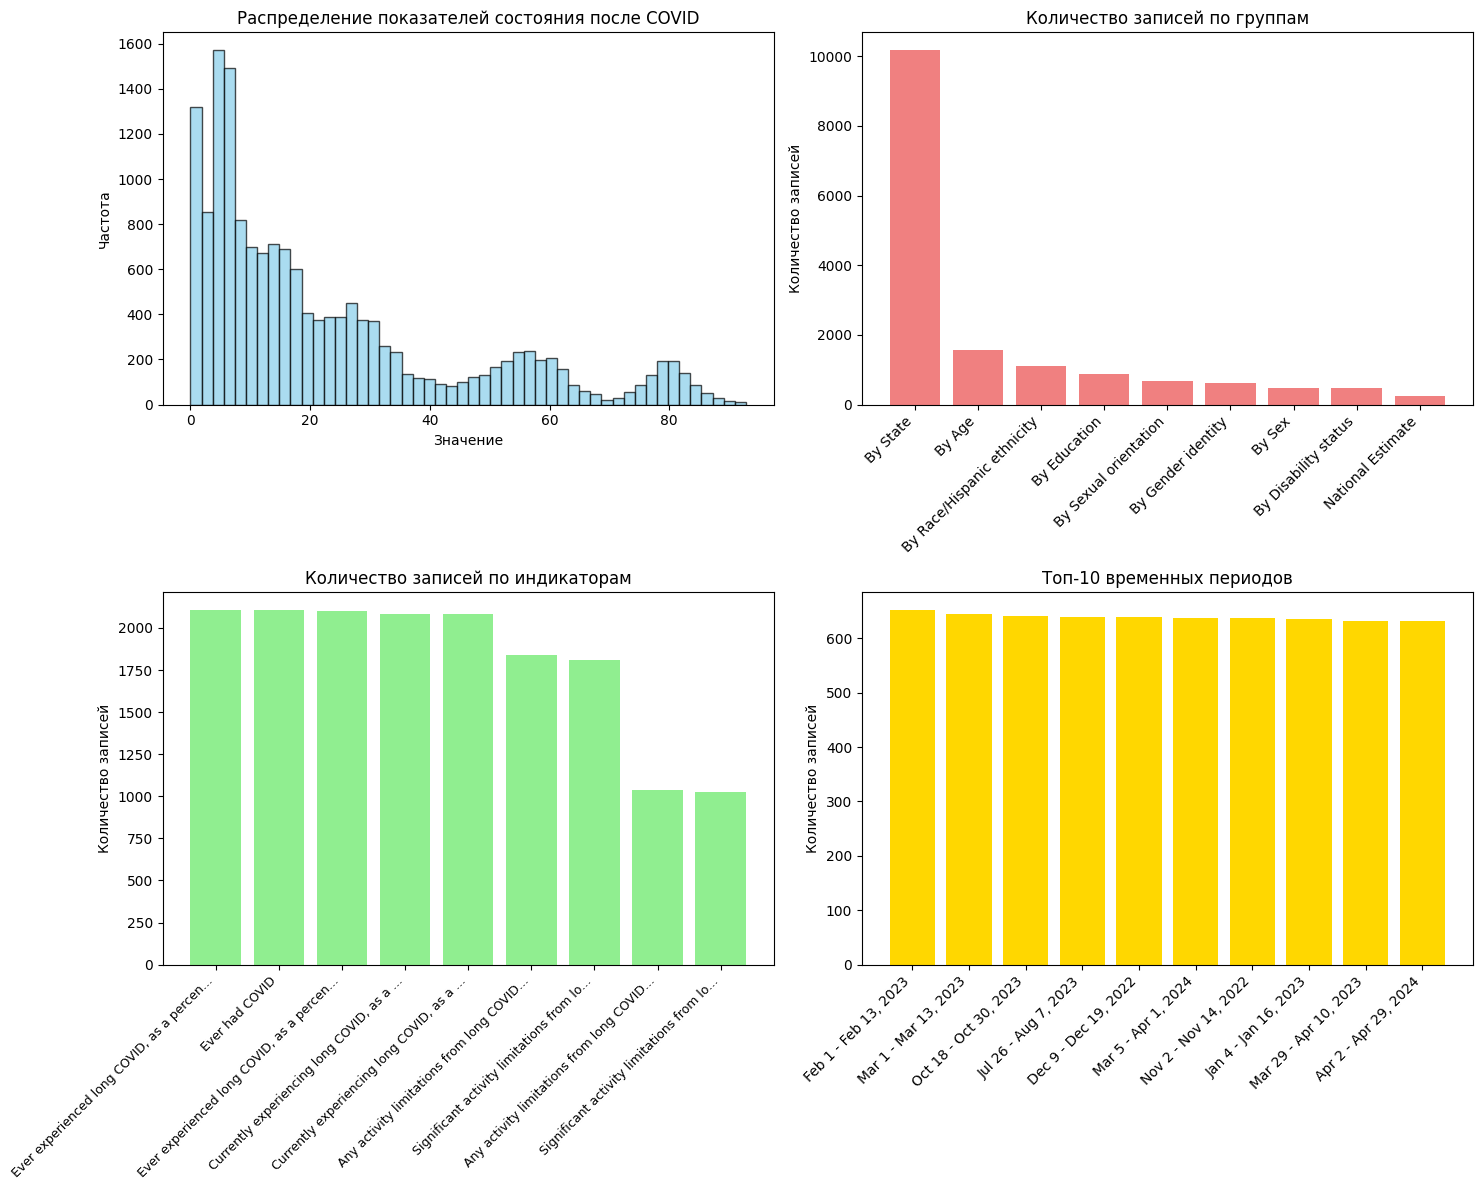

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Распределение значений
axes[0, 0].hist(df_clean['Value'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Распределение показателей состояния после COVID')
axes[0, 0].set_xlabel('Значение')
axes[0, 0].set_ylabel('Частота')

# Количество записей по группам
group_counts = df_clean['Group'].value_counts()
bars = axes[0, 1].bar(range(len(group_counts)), group_counts.values, color='lightcoral')
axes[0, 1].set_title('Количество записей по группам')
axes[0, 1].set_xticks(range(len(group_counts)))
axes[0, 1].set_xticklabels(group_counts.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Количество записей')

# Количество записей по индикаторам
indicator_counts = df_clean['Indicator'].value_counts()
short_indicator_names = [name[:40] + '...' if len(name) > 40 else name for name in indicator_counts.index]
bars = axes[1, 0].bar(range(len(indicator_counts)), indicator_counts.values, color='lightgreen')
axes[1, 0].set_title('Количество записей по индикаторам')
axes[1, 0].set_xticks(range(len(indicator_counts)))
axes[1, 0].set_xticklabels(short_indicator_names, rotation=45, ha='right', fontsize=9)
axes[1, 0].set_ylabel('Количество записей')

# Временное распределение
time_periods = df_clean['Time Period Label'].value_counts().head(10)
bars = axes[1, 1].bar(range(len(time_periods)), time_periods.values, color='gold')
axes[1, 1].set_title('Топ-10 временных периодов')
axes[1, 1].set_xticks(range(len(time_periods)))
axes[1, 1].set_xticklabels(time_periods.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Количество записей')

plt.tight_layout()
plt.show()

Анализ по основным индикаторам:

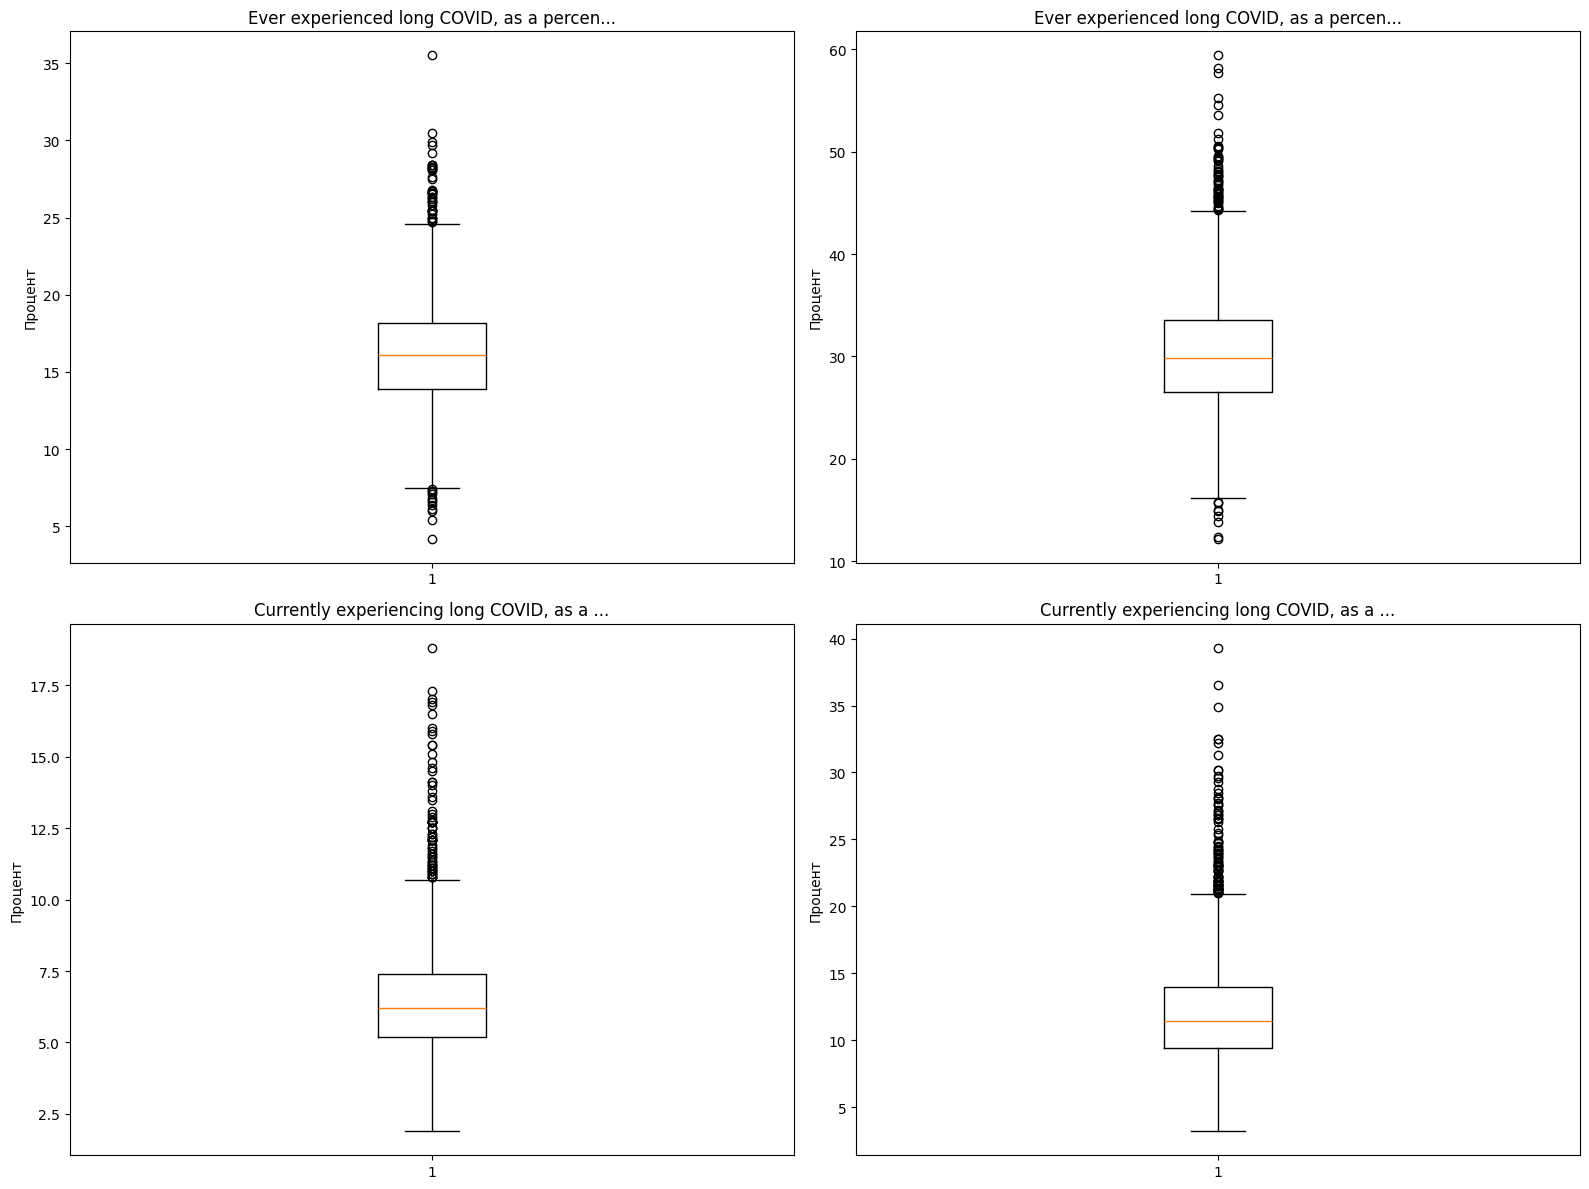

In [ ]:
main_indicators = [
    "Ever experienced long COVID, as a percentage of all adults",
    "Ever experienced long COVID, as a percentage of adults who ever had COVID",
    "Currently experiencing long COVID, as a percentage of all adults",
    "Currently experiencing long COVID, as a percentage of adults who ever had COVID"
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, indicator in enumerate(main_indicators):
    row, col = i // 2, i % 2
    data = df_clean[df_clean['Indicator'] == indicator]

    if not data.empty:
        # Боксплот для распределения значений
        axes[row, col].boxplot(data['Value'].dropna())
        axes[row, col].set_title(f'{indicator[:40]}...')
        axes[row, col].set_ylabel('Процент')

plt.tight_layout()
plt.show()

Количество людей болеющих сейчас/когда-то Long COVID в процентах от всех взрослых, когда-либо болевших COVID, больше, чем от всех взрослых

Выбросы могут указывать на группы с исключительным риском

<Figure size 1000x800 with 0 Axes>

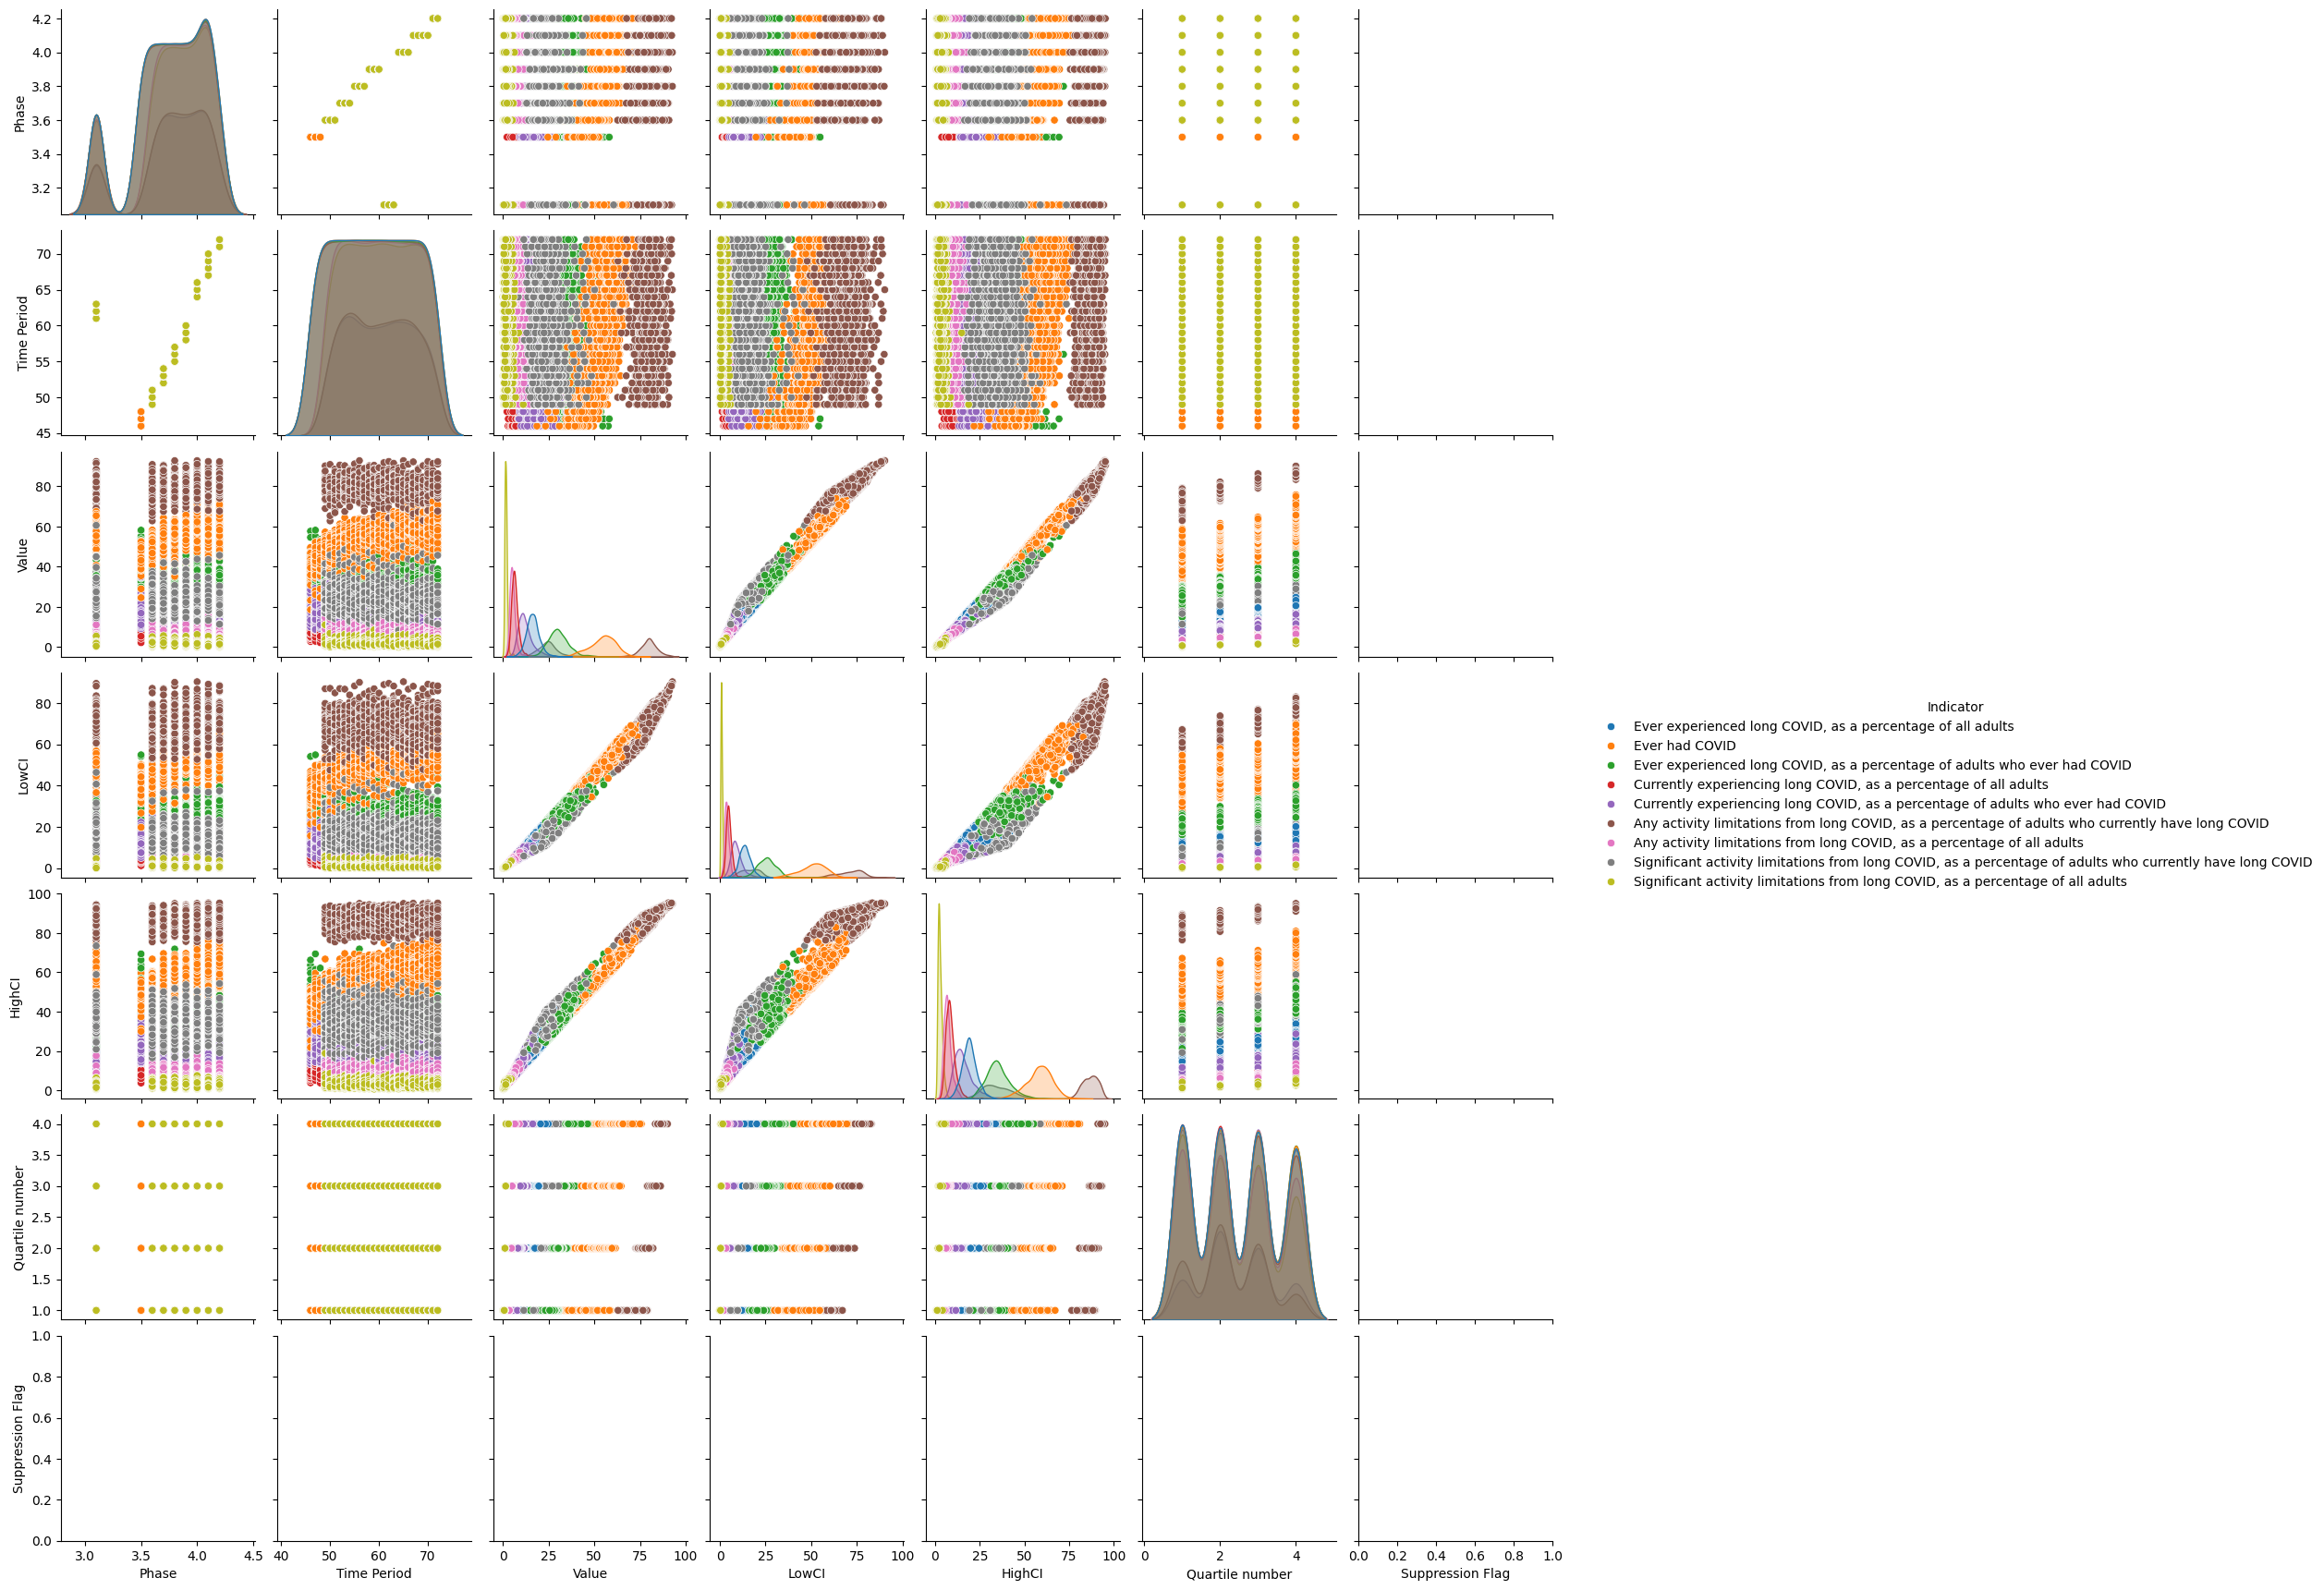

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(df_clean, hue='Indicator')
plt.show()

Анализ по демографическим группам:

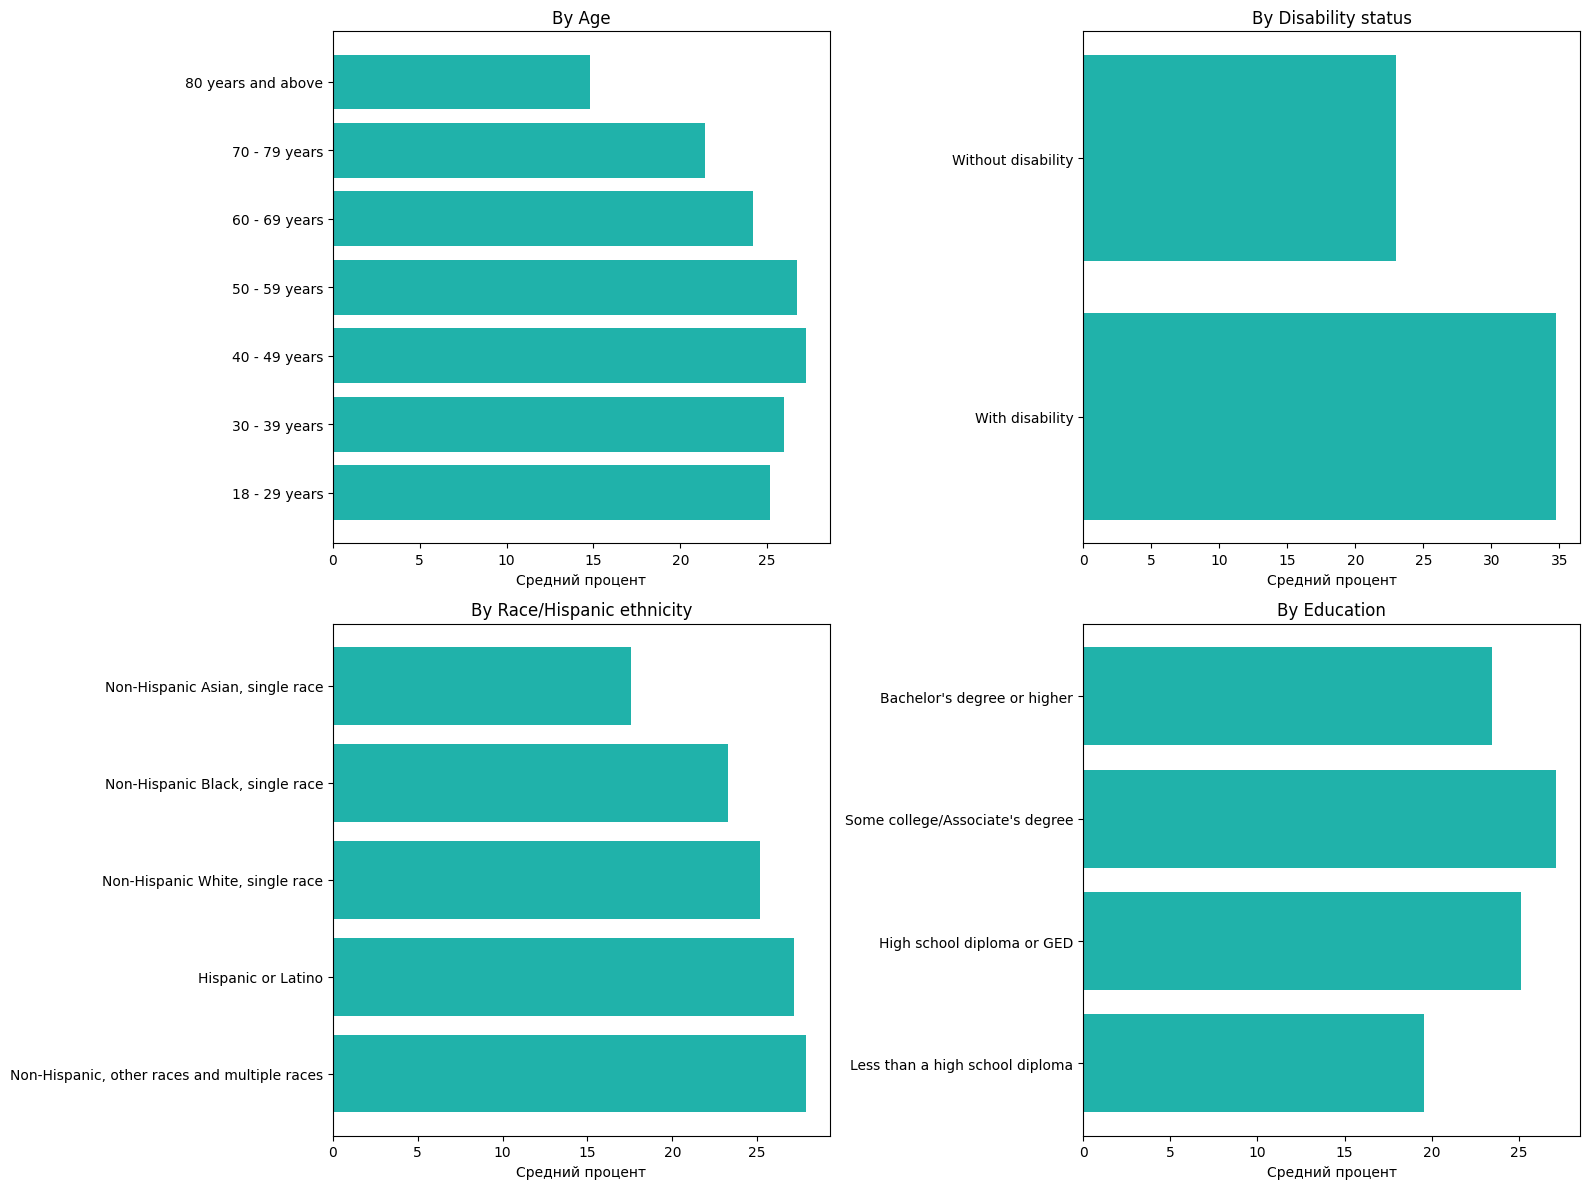

In [ ]:
demographic_groups = ['By Age', 'By Disability status', 'By Race/Hispanic ethnicity', 'By Education']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, group in enumerate(demographic_groups):
    row, col = i // 2, i % 2
    group_data = df_clean[df_clean['Group'] == group]

    if not group_data.empty:
        if group == 'By Age':
            age_order = [
                '18 - 29 years',
                '30 - 39 years',
                '40 - 49 years',
                '50 - 59 years',
                '60 - 69 years',
                '70 - 79 years',
                '80 years and above'
            ]
            subgroup_means = group_data.groupby('Subgroup')['Value'].mean()
            subgroup_means = subgroup_means.reindex(age_order)
        elif group == 'By Education':
            study_order = [
                "Less than a high school diploma",
                "High school diploma or GED",
                "Some college/Associate's degree",
                "Bachelor's degree or higher"
            ]
            subgroup_means = group_data.groupby('Subgroup')['Value'].mean()
            subgroup_means = subgroup_means.reindex(study_order)
        else:
            subgroup_means = group_data.groupby('Subgroup')['Value'].mean().sort_values(ascending=False)
        axes[row, col].barh(subgroup_means.index, subgroup_means.values, color='lightseagreen')
        axes[row, col].set_title(f'{group}')
        axes[row, col].set_xlabel('Средний процент')

plt.tight_layout()
plt.show()

Наличие инвалидности значительно повышает риск Long COVID:

* Лица с инвалидностью: 34.8%
* Лица без инвалидности: 23.0%



Раса влияет на риск развития Long COVID:

* Наибольшая распространенность среди латиноамериканцев (27.2%); наименьшая - среди азиатов (17.6%). Чернокожее население и представители других рас демонстрируют промежуточные значения

Анализ по штатам:

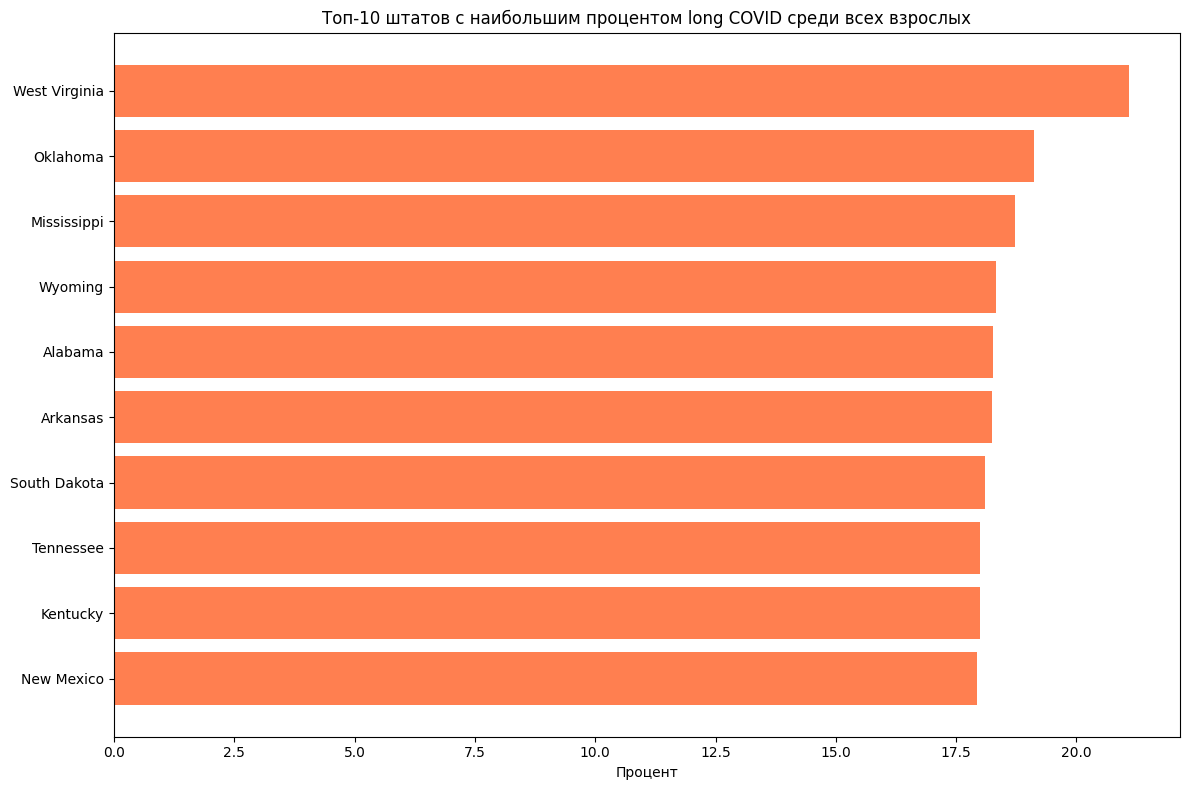

In [ ]:
state_data = df_clean[df_clean['Group'] == 'By State']

# Топ-10 штатов с наибольшим процентом long COVID
top_states_long_covid = state_data[state_data['Indicator'] == "Ever experienced long COVID, as a percentage of all adults"]
state_means = top_states_long_covid.groupby('State')['Value'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(state_means.index, state_means.values, color='coral')
plt.title('Топ-10 штатов с наибольшим процентом long COVID среди всех взрослых')
plt.xlabel('Процент')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Временной анализ:

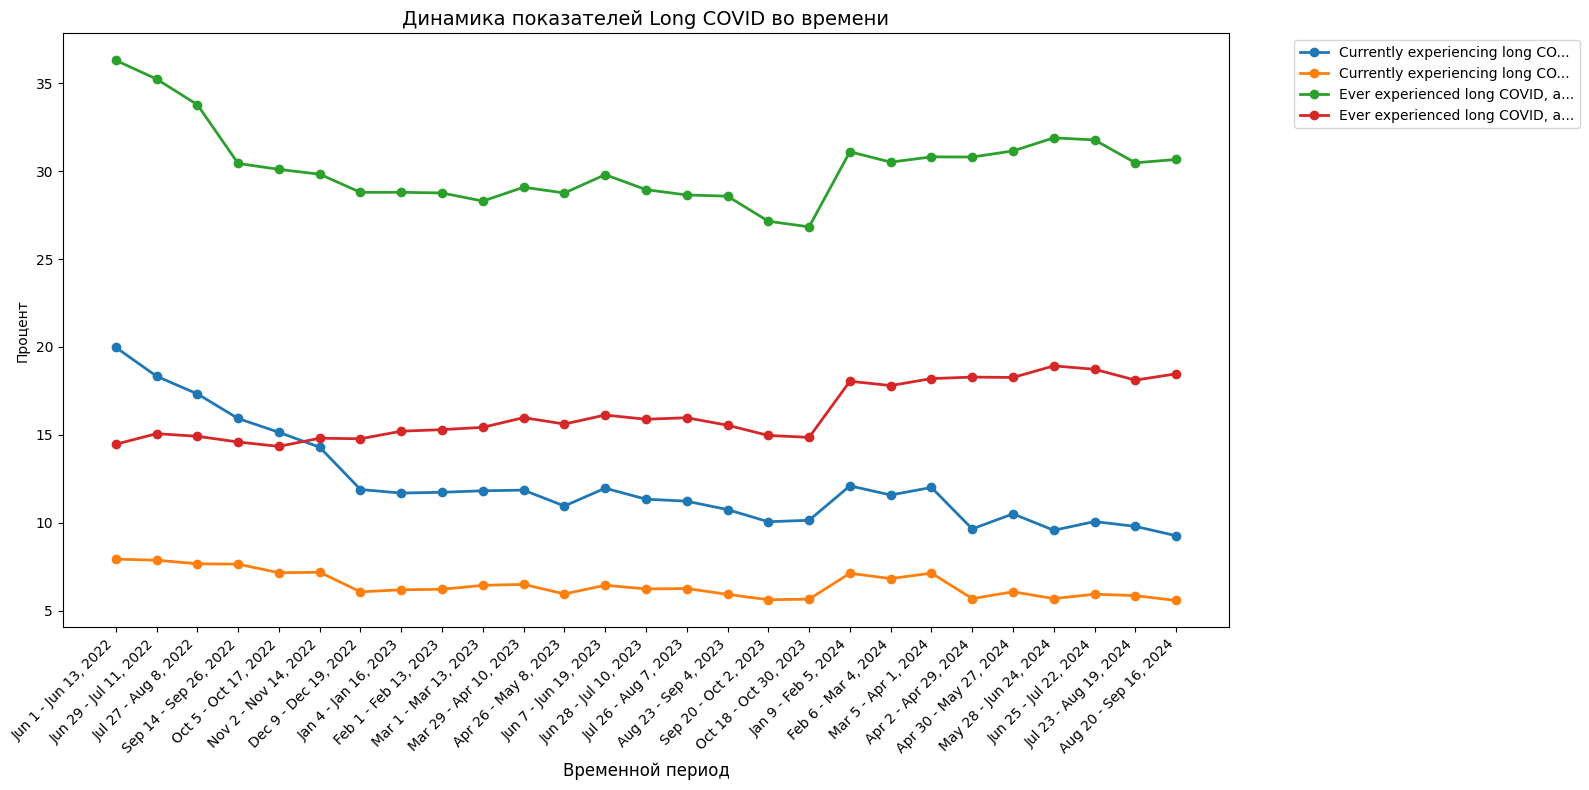

In [ ]:
time_analysis = df_clean.groupby(['Time Period Label', 'Indicator'])['Value'].mean().unstack()

# Создаем временный DataFrame для сортировки
temp_df = df_clean[['Time Period Label', 'Time Period Start Date']].drop_duplicates()
date_mapping = temp_df.set_index('Time Period Label')['Time Period Start Date'].to_dict()

# Сортируем индексы по датам
sorted_labels = sorted(time_analysis.index, key=lambda x: date_mapping[x])
time_analysis_sorted = time_analysis.reindex(sorted_labels)

plt.figure(figsize=(16, 8))
for column in time_analysis_sorted.columns:
    if column in main_indicators:
        plt.plot(time_analysis_sorted.index, time_analysis_sorted[column],
                marker='o', linewidth=2, markersize=6, label=column[:30]+'...')

plt.title('Динамика показателей Long COVID во времени', fontsize=14)
plt.xlabel('Временной период', fontsize=12)
plt.ylabel('Процент')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Временные тенденции показывают изменение распространенности



Матрица корреляции для числовых признаков:

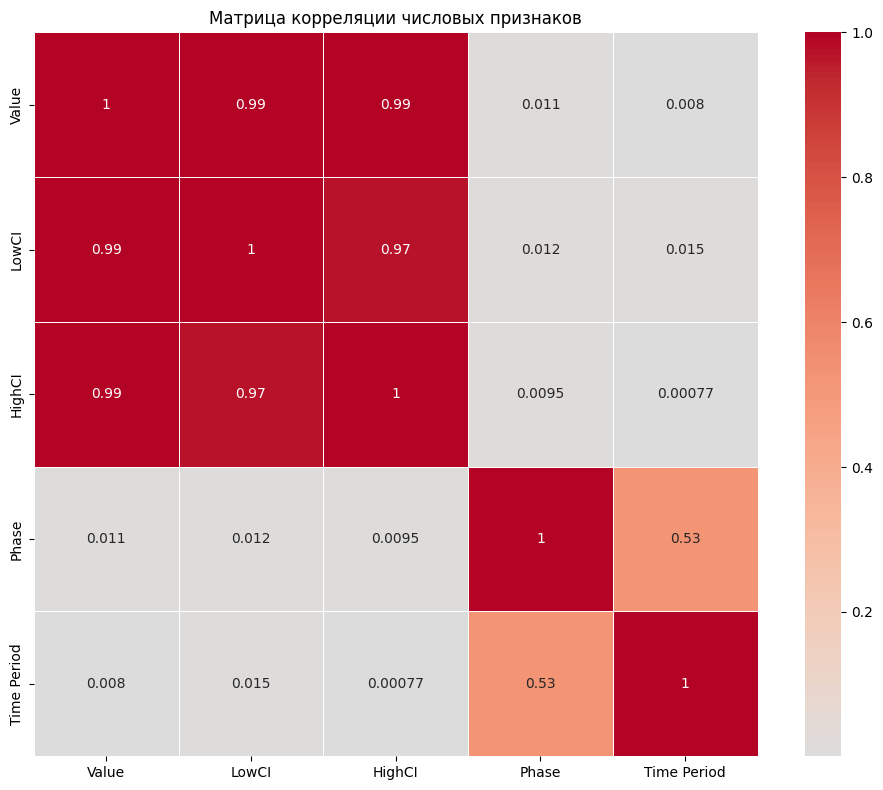

In [ ]:
numeric_columns = ['Value', 'LowCI', 'HighCI', 'Phase', 'Time Period']
numeric_df = df_clean[numeric_columns].dropna()

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Матрица корреляции числовых признаков')
plt.tight_layout()
plt.show()

Доверительные интервалы тесно связаны с основным значением (ожидаемо). Подтверждается качество данных - доверительные интервалы правильно отражают неопределённость измерений.

Статистический анализ по полу:

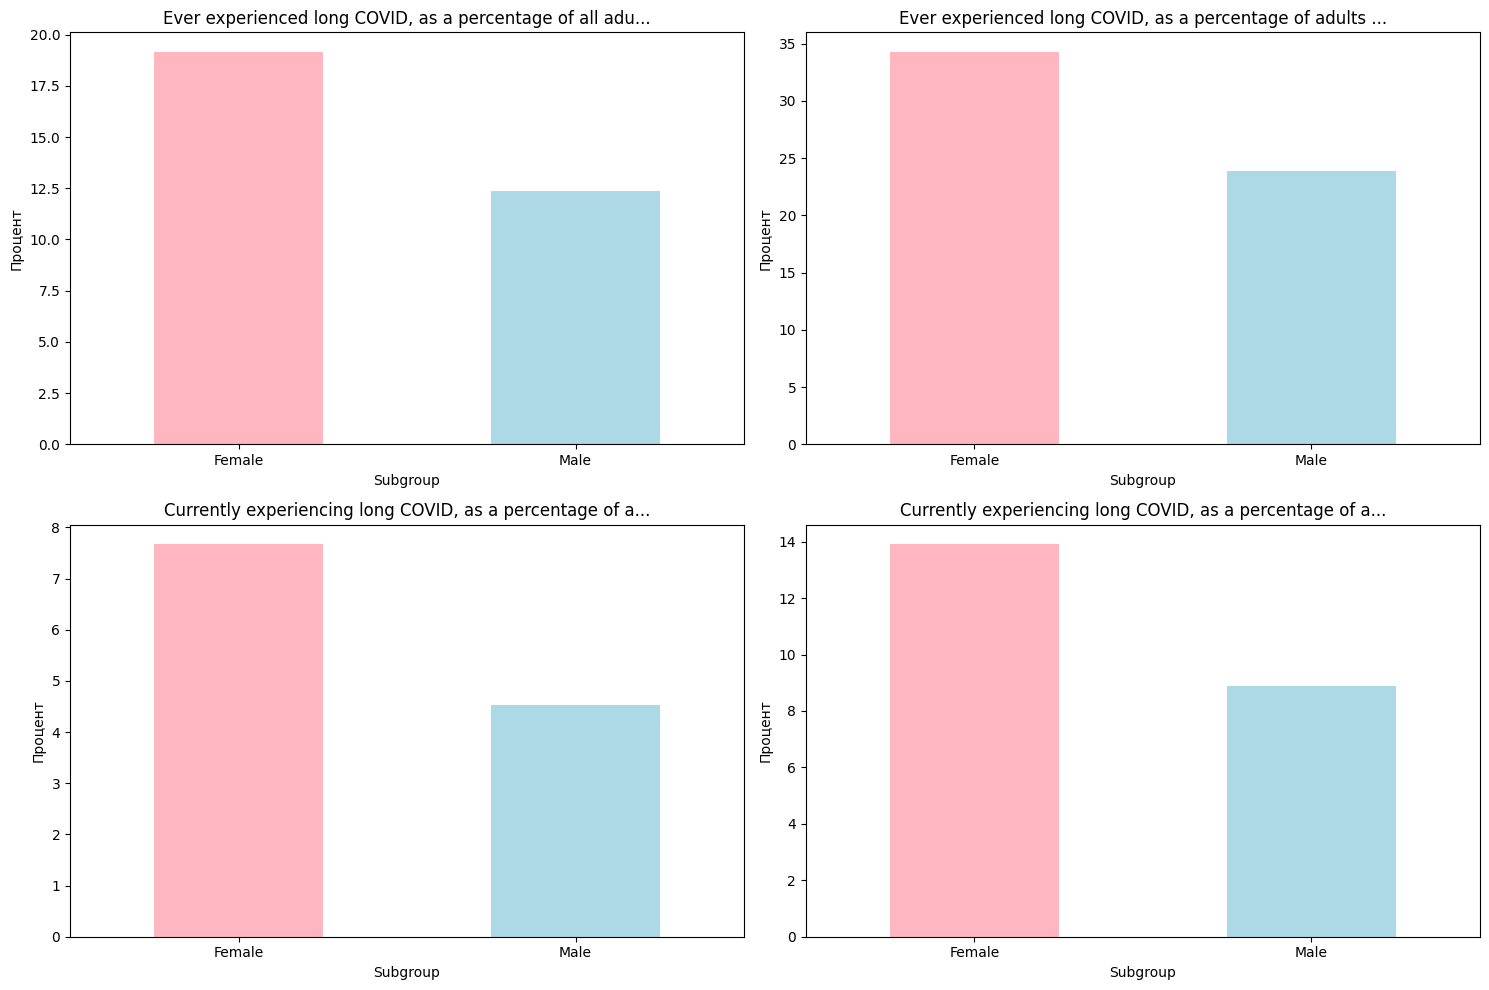

In [ ]:
gender_data = df_clean[df_clean['Group'] == 'By Sex']
gender_comparison = gender_data.groupby(['Subgroup', 'Indicator'])['Value'].mean().unstack()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

indicators_to_plot = main_indicators
for i, indicator in enumerate(indicators_to_plot):
    if indicator in gender_comparison.columns:
        row, col = i // 2, i % 2
        gender_comparison[indicator].plot(kind='bar', ax=axes[row, col], color=['lightpink', 'lightblue'])
        axes[row, col].set_title(indicator[:55] + '...')
        axes[row, col].set_ylabel('Процент')
        axes[row, col].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Вывод:

* Женщины значительно чаще страдают от Long COVID (18.6% vs 13.1% среди всех взрослых). Среди переболевших COVID женщины в 1.5 раза чаще сообщают о Long COVID

Анализ по возрастным группам:

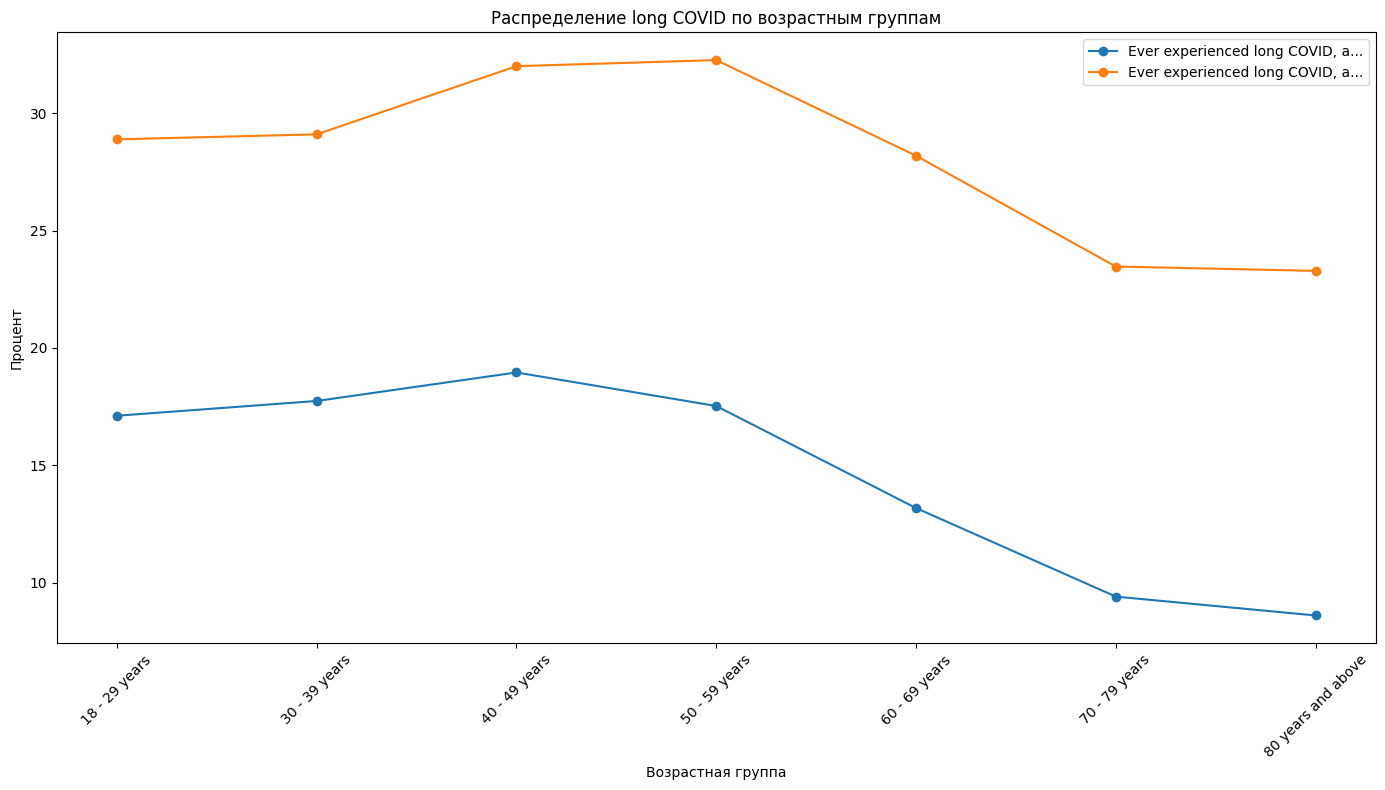

In [ ]:
age_data = df_clean[df_clean['Group'] == 'By Age']
age_analysis = age_data.groupby(['Subgroup', 'Indicator'])['Value'].mean().unstack()

plt.figure(figsize=(14, 8))
for indicator in main_indicators[:2]:  # Первые два основных индикатора
    if indicator in age_analysis.columns:
        plt.plot(age_analysis.index, age_analysis[indicator], marker='o', label=indicator[:30]+'...')

plt.title('Распределение long COVID по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод:

* Наибольшая распространенность Long COVID в группах 18-29 лет (17.8%) и 40-49 лет (19.8%); минимальные показатели у лиц 80+ лет (5.3%) → наблюдается снижение риска заболевания после 50 лет

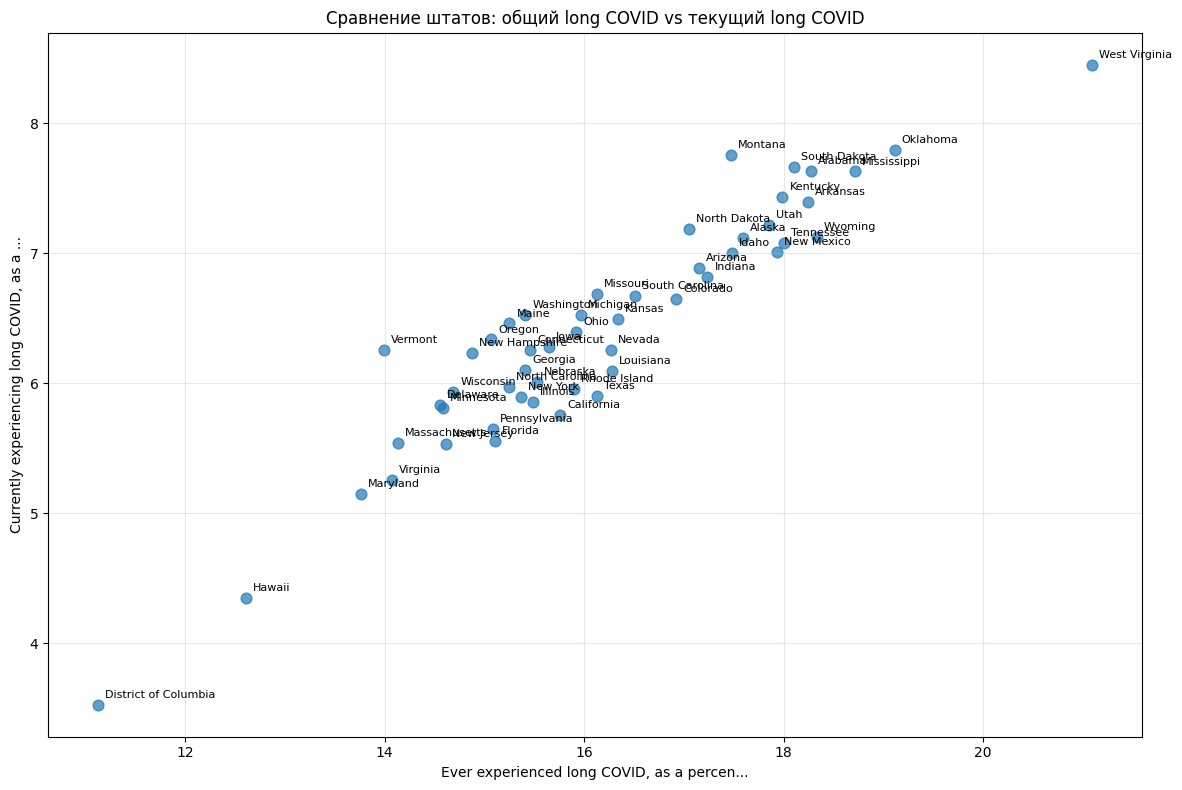

In [ ]:
# Дополнительный анализ: сравнение штатов по разным метрикам
state_comparison = state_data.pivot_table(index='State',
                                        columns='Indicator',
                                        values='Value',
                                        aggfunc='mean')

# Выбираем наиболее репрезентативные метрики для сравнения штатов
comparison_metrics = [
    "Ever experienced long COVID, as a percentage of all adults",
    "Currently experiencing long COVID, as a percentage of all adults"
]

if all(metric in state_comparison.columns for metric in comparison_metrics):
    plt.figure(figsize=(12, 8))
    plt.scatter(state_comparison[comparison_metrics[0]],
               state_comparison[comparison_metrics[1]],
               alpha=0.7, s=60)

    # Добавляем названия штатов для выбросов
    for state in state_comparison.index:
        plt.annotate(state,
                    (state_comparison.loc[state, comparison_metrics[0]],
                     state_comparison.loc[state, comparison_metrics[1]]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.xlabel(comparison_metrics[0][:40] + '...')
    plt.ylabel(comparison_metrics[1][:40] + '...')
    plt.title('Сравнение штатов: общий long COVID vs текущий long COVID')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Существуют географические различия между штатами

* Штаты с наивысшей распространенностью: Оклахома, Западная Вирджиния, Миссисипи
* Штаты с наименьшей распространенностью: Округ Коламбия, Мэрилэнд, Гавайи, Вирджиния



# Ключевые закономерности и общие выводы:

1. **Наиболее уязвимые группы:**

*   Женщины всех возрастных групп
* Взрослые (40-49 лет)
* Латиноамериканское население
* Лица с низким уровнем образования
* Люди с инвалидностью

2. **Географическая распространённость:**

* Высокая распространность в: Юго-восточных штатах, Горных штатах, Аляске
* Низкая распространность в: Северо-восточных штатах, Тихоокеанском регионе







# КОМПЛЕКСНЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ ГИПОТЕЗ LONG COVID

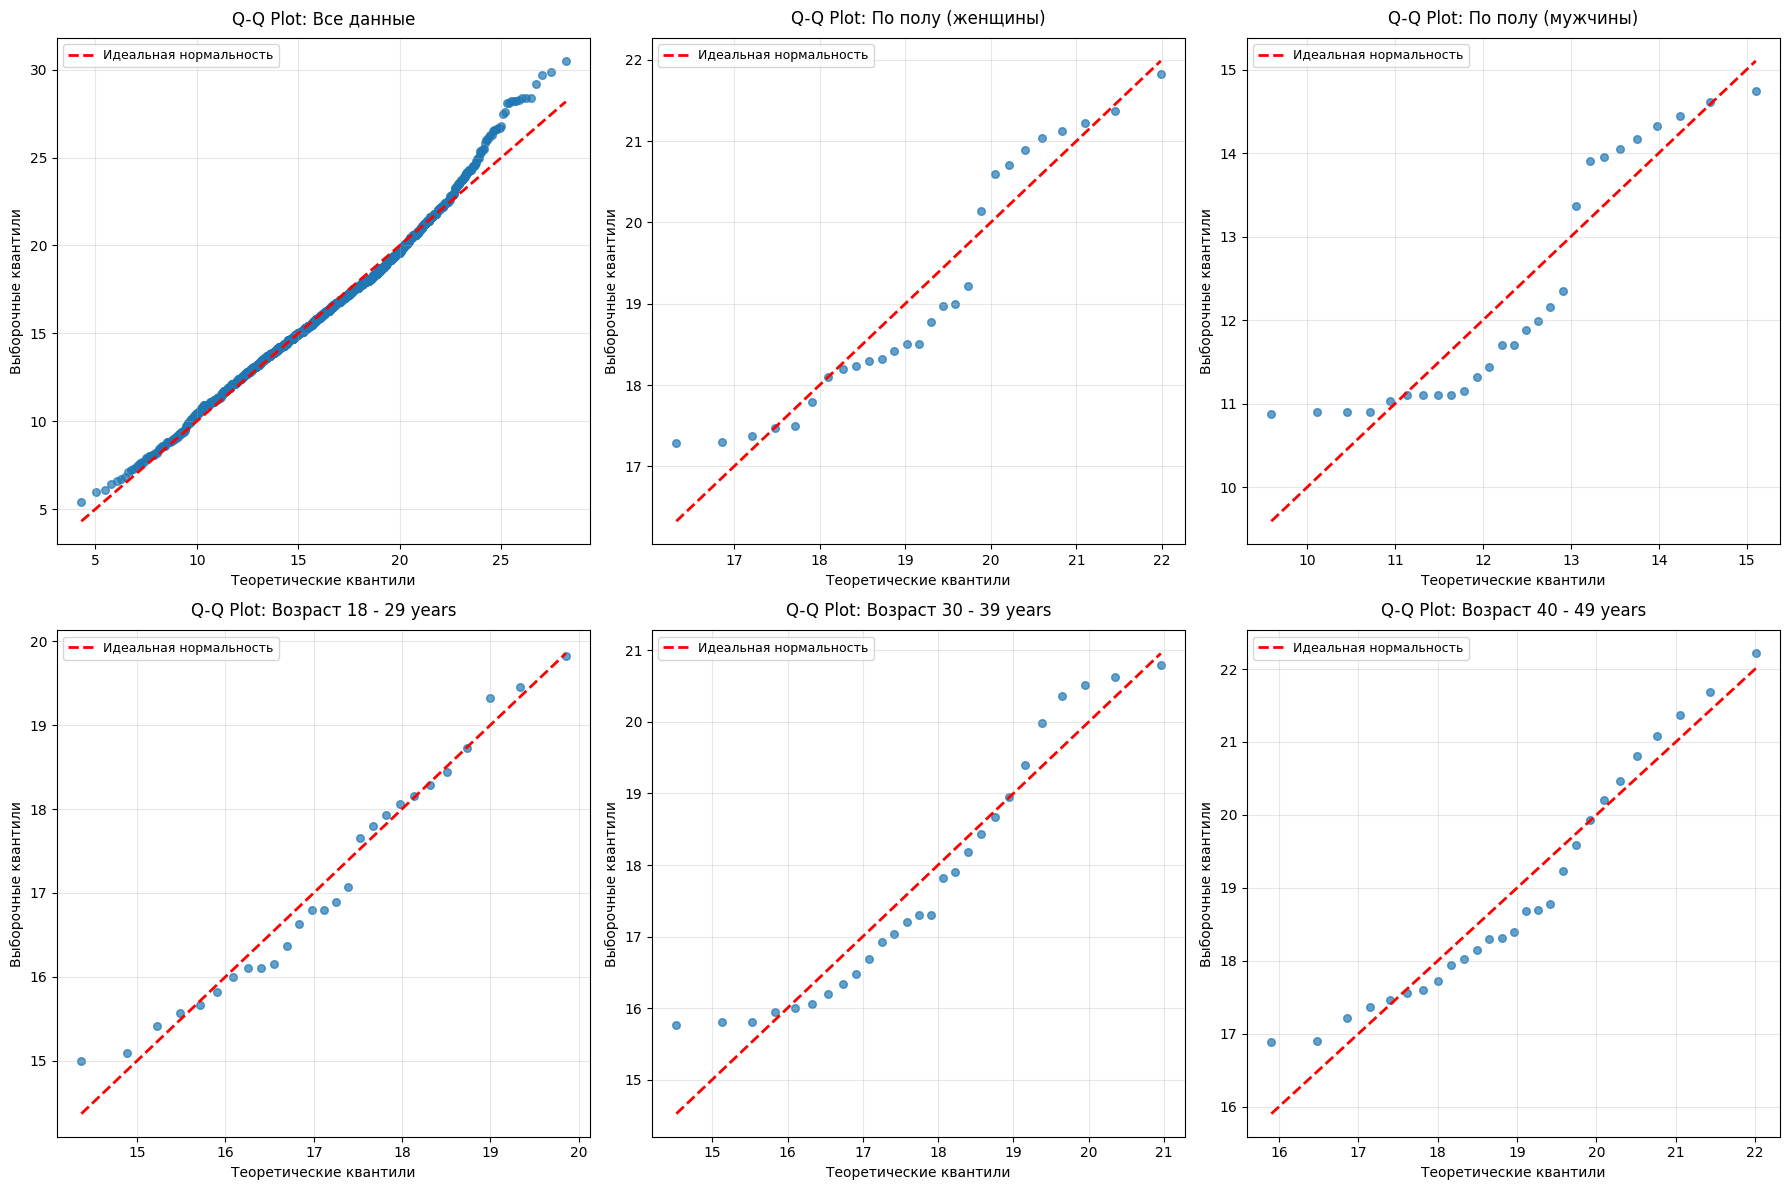

In [ ]:
# Основной индикатор для анализа
main_indicator = "Ever experienced long COVID, as a percentage of all adults"

# Берем основные данные для проверки нормальности
data_to_check = {
    'Все данные': df_clean[df_clean['Indicator'] == main_indicator]['Value'],
    'По полу (женщины)': df_clean[
        (df_clean['Group'] == 'By Sex') &
        (df_clean['Subgroup'] == 'Female') &
        (df_clean['Indicator'] == main_indicator)
    ]['Value'],
    'По полу (мужчины)': df_clean[
        (df_clean['Group'] == 'By Sex') &
        (df_clean['Subgroup'] == 'Male') &
        (df_clean['Indicator'] == main_indicator)
    ]['Value']
}

# Добавляем данные по возрастным группам
age_groups = ['18 - 29 years', '30 - 39 years', '40 - 49 years']
for age in age_groups:
    age_data = df_clean[
        (df_clean['Group'] == 'By Age') &
        (df_clean['Subgroup'] == age) &
        (df_clean['Indicator'] == main_indicator)
    ]['Value']
    if len(age_data) > 0:
        data_to_check[f'Возраст {age}'] = age_data

# Создаем Q-Q plot для каждого набора данных
keys = list(data_to_check.keys())
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, key in enumerate(keys):
    if i < len(axes):
        samples = data_to_check[key].dropna()

        if len(samples) > 2:  # Минимум 3 точки для Q-Q plot
            # Параметры нормального распределения
            loc = samples.mean()
            scale = samples.std()

            # Теоретические и эмпирические квантили
            interval = np.linspace(0, 1, len(samples) + 2)[1:-1]
            x = stats.norm.ppf(interval, loc=loc, scale=scale)
            y = np.quantile(samples, interval)

            # Q-Q plot
            axes[i].scatter(x, y, s=30, alpha=0.7)
            axes[i].plot(x, x, color='red', linestyle='dashed', linewidth=2, label='Идеальная нормальность')

            # Настройка оформления
            axes[i].set_title(f'Q-Q Plot: {key}',
                            fontsize=12, pad=10)
            axes[i].set_xlabel('Теоретические квантили', fontsize=10)
            axes[i].set_ylabel('Выборочные квантили', fontsize=10)
            axes[i].legend(fontsize=9)
            axes[i].grid(True, alpha=0.3)

        else:
            axes[i].text(0.5, 0.5, f'Недостаточно данных\nn = {len(samples)}',
                       ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f'{key}', fontsize=12)

# Удаляем лишние subplots
for j in range(len(keys), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Демографические факторы влияют на заболеваемость

In [ ]:
# Общий индикатор для сравнения
main_indicator = "Ever experienced long COVID, as a percentage of all adults"

# 1. Статистическая проверка: Влияние расы на заболеваемость
print("\n1. ВЛИЯНИЕ РАСЫ НА ЗАБОЛЕВАЕМОСТЬ LONG COVID")
race_data = df_clean[
    (df_clean['Group'] == 'By Race/Hispanic ethnicity') &
    (df_clean['Indicator'] == main_indicator)
]

race_groups = {}
for race in race_data['Subgroup'].unique():
    group_values = race_data[race_data['Subgroup'] == race]['Value']
    if len(group_values) > 0:
        race_groups[race] = group_values
        print(f"   {race}: {group_values.mean():.2f}% (n={len(group_values)})")

if len(race_groups) >= 2:
    # One-way ANOVA
    anova_result = f_oneway(*race_groups.values())
    print(f"   ANOVA: F = {anova_result.statistic:.3f}, p-value = {anova_result.pvalue:.6f}")

    if anova_result.pvalue < 0.05:
        print("   ✅ Статистически значимые различия между расами (p < 0.05)")
    else:
        print("   ❌ Нет статистически значимых различий между расами")

# 2. Статистическая проверка: Влияние образования на заболеваемость
print("\n2. ВЛИЯНИЕ ОБРАЗОВАНИЯ НА ЗАБОЛЕВАЕМОСТЬ LONG COVID")
education_data = df_clean[
    (df_clean['Group'] == 'By Education') &
    (df_clean['Indicator'] == main_indicator)
]

edu_groups = {}
edu_order = [
    'Less than a high school diploma',
    'High school diploma or GED',
    'Some college/Associate\'s degree',
    'Bachelor\'s degree or higher'
]

for edu in edu_order:
    if edu in education_data['Subgroup'].values:
        group_values = education_data[education_data['Subgroup'] == edu]['Value']
        if len(group_values) > 0:
            edu_groups[edu] = group_values
            print(f"   {edu}: {group_values.mean():.2f}% (n={len(group_values)})")

if len(edu_groups) >= 2:
    # Тест на линейный тренд (образование как порядковая переменная)
    edu_means = [edu_groups[edu].mean() for edu in edu_order if edu in edu_groups]
    if len(edu_means) >= 2:
        # Коэффициент корреляции Пирсона
        pearsonr_corr, pearsonr_p = stats.pearsonr(range(len(edu_means)), edu_means)
        print(f"   Корреляция Пирсона: r = {pearsonr_corr:.3f}, p = {pearsonr_p:.6f}")

        if pearsonr_p < 0.05:
            direction = "отрицательная" if pearsonr_corr < 0 else "положительная"
            print(f"   ✅ Статистически значимый {direction} тренд с образованием")
        else:
            print("   ❌ Нет статистически значимого тренда с образованием")

# 3. Статистическая проверка: Влияние возраста на заболеваемость
print("\n3. ВЛИЯНИЕ ВОЗРАСТА НА ЗАБОЛЕВАЕМОСТЬ LONG COVID")
age_data = df_clean[
    (df_clean['Group'] == 'By Age') &
    (df_clean['Indicator'] == main_indicator)
]

age_groups = {}
age_order = ['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years',
             '60 - 69 years', '70 - 79 years', '80 years and above']

for age in age_order:
    if age in age_data['Subgroup'].values:
        group_values = age_data[age_data['Subgroup'] == age]['Value']
        if len(group_values) > 0:
            age_groups[age] = group_values
            print(f"   {age}: {group_values.mean():.2f}% (n={len(group_values)})")

if len(age_groups) >= 2:
    # One-way ANOVA
    anova_age = f_oneway(*age_groups.values())
    print(f"   ANOVA: F = {anova_age.statistic:.3f}, p-value = {anova_age.pvalue:.6f}")

    if anova_age.pvalue < 0.05:
        print("   ✅ Статистически значимые различия между возрастными группами")
    else:
        print("   ❌ Нет статистически значимых различий между возрастными группами")

# 4. Статистическая проверка: Влияние инвалидности на заболеваемость
print("\n4. ВЛИЯНИЕ ИНВАЛИДНОСТИ НА ЗАБОЛЕВАЕМОСТЬ LONG COVID")
disability_data = df_clean[
    (df_clean['Group'] == 'By Disability status') &
    (df_clean['Indicator'] == main_indicator)
]

disabled_group = disability_data[disability_data['Subgroup'] == 'With disability']['Value']
non_disabled_group = disability_data[disability_data['Subgroup'] == 'Without disability']['Value']

if len(disabled_group) > 0 and len(non_disabled_group) > 0:
    # T-тест для независимых выборок
    t_stat, p_value = ttest_ind(disabled_group, non_disabled_group, equal_var=False)

    print(f"   С инвалидностью: {disabled_group.mean():.2f}% (n={len(disabled_group)})")
    print(f"   Без инвалидности: {non_disabled_group.mean():.2f}% (n={len(non_disabled_group)})")
    print(f"   T-тест: t = {t_stat:.3f}, p-value = {p_value:.6f}")

    if p_value < 0.05:
        print("   ✅ Статистически значимое влияние инвалидности")
    else:
        print("   ❌ Нет статистически значимого влияния инвалидности")

# 5. Статистическая проверка: Влияние пола на заболеваемость
print("\n5. ВЛИЯНИЕ ПОЛА НА ЗАБОЛЕВАЕМОСТЬ LONG COVID")
disability_data = df_clean[
    (df_clean['Group'] == 'By Sex') &
    (df_clean['Indicator'] == main_indicator)
]

male_group = disability_data[disability_data['Subgroup'] == 'Male']['Value']
female_group = disability_data[disability_data['Subgroup'] == 'Female']['Value']

if len(male_group) > 0 and len(female_group) > 0:
    # T-тест для независимых выборок
    t_stat, p_value = ttest_ind(male_group, female_group, equal_var=False)

    print(f"   Мужчины: {male_group.mean():.2f}% (n={len(male_group)})")
    print(f"   Женщины: {female_group.mean():.2f}% (n={len(female_group)})")
    print(f"   T-тест: t = {t_stat:.3f}, p-value = {p_value:.6f}")

    if p_value < 0.05:
        print("   ✅ Женщины болеют чаще мужчин")
    else:
        print("   ❌ Женщины НЕ болеют чаще")


1. ВЛИЯНИЕ РАСЫ НА ЗАБОЛЕВАЕМОСТЬ LONG COVID
   Hispanic or Latino: 19.13% (n=27)
   Non-Hispanic White, single race: 15.58% (n=27)
   Non-Hispanic Black, single race: 12.97% (n=27)
   Non-Hispanic Asian, single race: 10.74% (n=27)
   Non-Hispanic, other races and multiple races: 20.13% (n=27)
   ANOVA: F = 124.970, p-value = 0.000000
   ✅ Статистически значимые различия между расами (p < 0.05)

2. ВЛИЯНИЕ ОБРАЗОВАНИЯ НА ЗАБОЛЕВАЕМОСТЬ LONG COVID
   Less than a high school diploma: 16.38% (n=27)
   High school diploma or GED: 15.35% (n=27)
   Some college/Associate's degree: 18.69% (n=27)
   Bachelor's degree or higher: 13.62% (n=27)
   Корреляция Пирсона: r = -0.301, p = 0.698915
   ❌ Нет статистически значимого тренда с образованием

3. ВЛИЯНИЕ ВОЗРАСТА НА ЗАБОЛЕВАЕМОСТЬ LONG COVID
   18 - 29 years: 17.11% (n=27)
   30 - 39 years: 17.74% (n=27)
   40 - 49 years: 18.96% (n=27)
   50 - 59 years: 17.53% (n=27)
   60 - 69 years: 13.18% (n=27)
   70 - 79 years: 9.40% (n=27)
   80 years a

Существуют временные тенденции заболеваемости

In [ ]:
print("H₀: Нет временного тренда заболеваемости")
print("H₁: Есть статистически значимый временной тренд")

# Создаем числовую временную ось
df_clean['Time_Numeric'] = (df_clean['Time Period Start Date'] - df_clean['Time Period Start Date'].min()).dt.days

time_data = df_clean
if len(time_data) > 10:  # Достаточно точек для корреляции
    correlation, p_value = pearsonr(time_data['Time_Numeric'], time_data['Value'])

    print(f"Корреляция Пирсона: r = {correlation:.3f}, p-value = {p_value:.6f}")

    if p_value < 0.05:
        direction = "положительный" if correlation > 0 else "отрицательный"
        print(f"✅ ОТВЕРГАЕМ H₀: Есть статистически значимый {direction} тренд")
        print(f"   Заболеваемость {'растет' if correlation > 0 else 'снижается'} со временем")
    else:
        print("❌ НЕ ОТВЕРГАЕМ H₀: Нет статистически значимого тренда")

H₀: Нет временного тренда заболеваемости
H₁: Есть статистически значимый временной тренд
Корреляция Пирсона: r = 0.009, p-value = 0.271309
❌ НЕ ОТВЕРГАЕМ H₀: Нет статистически значимого тренда


Существуют географические различия между штатами

In [ ]:
print("H₀: Нет различий в заболеваемости между штатами")
print("H₁: Есть статистически значимые различия между штатами")

state_data = df_clean[
    (df_clean['Group'] == 'By State')
]

if len(state_data) > 0:
    states_anova = state_data.groupby('State')['Value'].apply(list)

    if len(states_anova) >= 2:
        stat, p_value = f_oneway(*states_anova.values)
        print(f"ANOVA между штатами: F = {stat:.3f}, p-value = {p_value:.10f}")

        if p_value < 0.05:
            print("✅ ОТВЕРГАЕМ H₀: Есть статистически значимые различия между штатами")

            # Анализ крайних значений
            state_means = state_data.groupby('State')['Value'].mean()
            max_state = state_means.idxmax()
            min_state = state_means.idxmin()
            print(f"   Максимальная заболеваемость: {max_state} ({state_means[max_state]:.1f}%)")
            print(f"   Минимальная заболеваемость: {min_state} ({state_means[min_state]:.1f}%)")
        else:
            print("❌ НЕ ОТВЕРГАЕМ H₀: Нет статистически значимых различий между штатами")

H₀: Нет различий в заболеваемости между штатами
H₁: Есть статистически значимые различия между штатами
ANOVA между штатами: F = 2.077, p-value = 0.0000131392
✅ ОТВЕРГАЕМ H₀: Есть статистически значимые различия между штатами
   Максимальная заболеваемость: Oklahoma (26.3%)
   Минимальная заболеваемость: Hawaii (16.4%)
